## Random forest
### Data preprocessing using label encoder

In [4]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support, f1_score, roc_curve, roc_auc_score, RocCurveDisplay, auc
from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

def convert(data):
    number = preprocessing.LabelEncoder()
    data['operator'] = number.fit_transform(data.operator)
    data['methodReturn'] = number.fit_transform(data.methodReturn)
    data['isKilled'] = number.fit_transform(data.isKilled)
    return data

# Read in data and display first 5 rows
features = pd.read_csv('py_files/training_data.csv',encoding= 'unicode_escape')
#print(features)
#print('The shape of our features is:', features.shape)

#Convert string to float
features=convert(features)
#print(features)
#print('The shape of our features is:', features.shape) 

# Use numpy to convert to arrays
# Labels are the values we want to predict
np_labels = np.array(features['isKilled'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('isKilled', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
np_features = np.array(features)

### Without validation set. Replicating paper

In [8]:
# Instantiate model with 100 decision trees default
rf = RandomForestClassifier(random_state = 5,criterion="entropy")
rf.fit(np_features, np_labels)
y_pred_train = rf.predict(np_features)
print(accuracy_score(np_labels, y_pred_train))
print(confusion_matrix(np_labels, y_pred_train))

0.980890923315304
[[462772   7418]
 [  3891 117732]]


### Validation set of size 50%

In [12]:
##Validation set create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(np_features, np_labels, test_size=0.5)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
rf = RandomForestClassifier(random_state = 5,criterion="entropy")
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_test)
print(accuracy_score(y_test, y_pred_train))
print(confusion_matrix(y_test, y_pred_train))

(295906, 14) (295906,)
(295907, 14) (295907,)
0.9568513080123147
[[226659   8293]
 [  4475  56480]]


### Validation set of size 25%

In [9]:
##Validation set create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(np_features, np_labels, test_size=0.25)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
rf = RandomForestClassifier(random_state = 5,criterion="entropy")
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_test)
print(accuracy_score(y_test, y_pred_train))
print(confusion_matrix(y_test, y_pred_train))

(443859, 14) (443859,)
(147954, 14) (147954,)
0.9578517647376887
[[113551   3940]
 [  2296  28167]]


### Validation set of size 75%

In [14]:
##Validation set create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(np_features, np_labels, test_size=0.75)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
rf = RandomForestClassifier(random_state = 5,criterion="entropy")
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_test)
print(accuracy_score(y_test, y_pred_train))
print(confusion_matrix(y_test, y_pred_train))

(147953, 14) (147953,)
(443860, 14) (443860,)
0.9540733564637498
[[339159  13808]
 [  6577  84316]]


### Feature importance with all the features

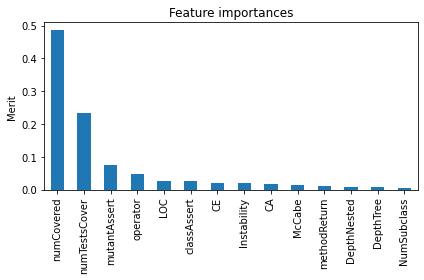

In [3]:
##Plot feature importance
feature_names = [f"features {i}" for i in range(features.shape[1])]
feature_names = features.columns
#feature_names = ['DepthTree', 'NumSubclass', 'McCabe', 'LOC','DepthNested','CA','CE','Instability','numCovered','operator','methodReturn','numTestsCover','mutantAssert','classAssert']
importances = rf.feature_importances_

forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
#Feature importance
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Merit")
fig.tight_layout()

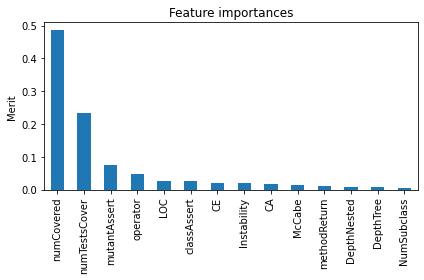

In [7]:
##Plot feature importance based on train test split
feature_names = [f"X_train {i}" for i in range(X_train.shape[1])]
feature_names = ['DepthTree', 'NumSubclass', 'McCabe', 'LOC','DepthNested','CA','CE','Instability','numCovered','operator','methodReturn','numTestsCover','mutantAssert','classAssert']
importances = rf.feature_importances_

forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
#Feature importance
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Merit")
fig.tight_layout()

### Feature selection based on Recursive Feature Elimination

In [38]:
from sklearn.feature_selection import RFE

#Initializing RFE model
rfe = RFE(rf, n_features_to_select=9, step=1)
#Transforming data using RFE
#X_rfe = rfe.fit(np_features, np_labels)  
selector = rfe.fit(np_features, np_labels)
print(selector.support_)
print(selector.ranking_)

[False False False  True False  True  True  True  True  True False  True
  True  True]
[5 6 2 1 4 1 1 1 1 1 3 1 1 1]


In [36]:
print(rfe.get_feature_names_out(input_features=None))

AttributeError: 'RFE' object has no attribute 'get_feature_names_out'

In [ ]:
#no of features
nof_list=np.arange(1,14)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(np_features, np_labels, test_size=0.5, random_state = 5)
    model = RandomForestClassifier(random_state = 5,criterion="entropy")
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        print (nof)
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(rfe.get_feature_names_out())

### Testing in test data

In [7]:
test = pd.read_csv('py_files/testing_data.csv',encoding= 'unicode_escape')

#Convert string to float
test=convert(test)

# ## Labels are the values we want to predict
np_test_labels = np.array(test['isKilled'])

# # Remove the labels from the features
# # axis 1 refers to the columns
test= test.drop('isKilled', axis = 1)
# # Saving feature names for later use
feature_list = list(test.columns)
# # Convert to numpy array
np_test = np.array(test)
y_pred_test = rf.predict(np_test)
#print("Predicted labels::", y_pred_test)
print(accuracy_score(np_test_labels, y_pred_test))
confusion = confusion_matrix(np_test_labels, y_pred_test)
print("Confusion_matrix:\n",confusion)
print(precision_recall_fscore_support(np_test_labels, y_pred_test, average='micro'))
print(f1_score(np_test_labels, y_pred_test, average='micro'))

0.8614268782156614
Confusion_matrix:
 [[79692 13290]
 [ 7287 48223]]
(0.8614268782156614, 0.8614268782156614, 0.8614268782156614, None)
0.8614268782156614


### Test result for 25% trained data

In [11]:
test = pd.read_csv('py_files/testing_data.csv',encoding= 'unicode_escape')

#Convert string to float
test=convert(test)

# ## Labels are the values we want to predict
np_test_labels = np.array(test['isKilled'])

# # Remove the labels from the features
# # axis 1 refers to the columns
test= test.drop('isKilled', axis = 1)
# # Saving feature names for later use
feature_list = list(test.columns)
# # Convert to numpy array
np_test = np.array(test)
y_pred_test = rf.predict(np_test)
#print("Predicted labels::", y_pred_test)
print(accuracy_score(np_test_labels, y_pred_test))
confusion = confusion_matrix(np_test_labels, y_pred_test)
print("Confusion_matrix:\n",confusion)
print(precision_recall_fscore_support(np_test_labels, y_pred_test, average='micro'))
print(f1_score(np_test_labels, y_pred_test, average='micro'))

0.8608679255448105
Confusion_matrix:
 [[80594 12388]
 [ 8272 47238]]
(0.8608679255448105, 0.8608679255448105, 0.8608679255448105, None)
0.8608679255448105


### Test result for 50% trained data

In [13]:
# # Convert to numpy array
np_test = np.array(test)
y_pred_test = rf.predict(np_test)
#print("Predicted labels::", y_pred_test)
print(accuracy_score(np_test_labels, y_pred_test))
confusion = confusion_matrix(np_test_labels, y_pred_test)
print("Confusion_matrix:\n",confusion)
print(precision_recall_fscore_support(np_test_labels, y_pred_test, average='micro'))
print(f1_score(np_test_labels, y_pred_test, average='micro'))

0.8600598012014116
Confusion_matrix:
 [[80774 12208]
 [ 8572 46938]]
(0.8600598012014116, 0.8600598012014116, 0.8600598012014116, None)
0.8600598012014116


### Test result for 75% trained data

In [15]:
# # Convert to numpy array
np_test = np.array(test)
y_pred_test = rf.predict(np_test)
#print("Predicted labels::", y_pred_test)
print(accuracy_score(np_test_labels, y_pred_test))
confusion = confusion_matrix(np_test_labels, y_pred_test)
print("Confusion_matrix:\n",confusion)
print(precision_recall_fscore_support(np_test_labels, y_pred_test, average='micro'))
print(f1_score(np_test_labels, y_pred_test, average='micro'))

0.8640532823317081
Confusion_matrix:
 [[81078 11904]
 [ 8283 47227]]
(0.8640532823317081, 0.8640532823317081, 0.8640532823317081, None)
0.8640532823317081


### Dropping DepthTree, methodReturn, DepthNested, Mutant assert brute force. 

In [25]:
new_features= features.drop('DepthTree', axis = 1)
new_features= new_features.drop('methodReturn', axis = 1)
new_features= new_features.drop('DepthNested', axis = 1)
new_features= new_features.drop('mutantAssert', axis = 1)
print('The shape of our features is:', new_features.shape)
# Convert to numpy array
np_features = np.array(new_features)
X_train, X_test, y_train, y_test = train_test_split(np_features, np_labels, test_size=0.5, random_state = 5)
# Instantiate model with 100 decision trees default
rf = RandomForestClassifier(random_state = 5,criterion="entropy")
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_test)
print(accuracy_score(y_test, y_pred_train))
print(confusion_matrix(y_test, y_pred_train))

The shape of our features is: (591813, 10)
0.9553305599394404
[[226600   8631]
 [  4587  56089]]


### Testing on test data

In [26]:
new_test= test.drop('DepthTree', axis = 1)
new_test= new_test.drop('methodReturn', axis = 1)
new_test= new_test.drop('DepthNested', axis = 1)
new_test= new_test.drop('mutantAssert', axis = 1)
print('The shape of our features is:', new_test.shape) 
# # Convert to numpy array
np_test = np.array(new_test)
y_pred_test = rf.predict(np_test)
#print("Predicted labels::", y_pred_test)
print(accuracy_score(np_test_labels, y_pred_test))
confusion = confusion_matrix(np_test_labels, y_pred_test)
print("Confusion_matrix:\n",confusion)
print(precision_recall_fscore_support(np_test_labels, y_pred_test, average='micro'))
print(f1_score(np_test_labels, y_pred_test, average='micro'))

The shape of our features is: (148492, 10)
0.8709694798372977
Confusion_matrix:
 [[81399 11583]
 [ 7577 47933]]
(0.8709694798372977, 0.8709694798372977, 0.8709694798372978, None)
0.8709694798372978


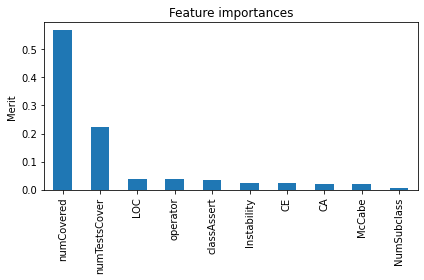

In [27]:
##Plot feature importance
feature_names = [f"new_features {i}" for i in range(new_features.shape[1])]
feature_names = ['NumSubclass', 'McCabe', 'LOC', 'CA', 'CE',
       'Instability', 'numCovered', 'operator',
       'numTestsCover', 'classAssert']
importances = rf.feature_importances_

forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
#Feature importance
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Merit")
fig.tight_layout()

### Grid search for reduced 11 features

In [ ]:
from sklearn.model_selection import GridSearchCV

#Hyper parameter tuning
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 6)]
# Maximum number of levels in tree
max_depth = [10,20]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
#Criterion to getinformation gain
criterion = ['entropy','gini']
# Create the  grid
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}
print(grid)

# Import the model we are using
rf = RandomForestClassifier(random_state = 5)
# Use the grid to search for best hyperparameters
# First create the base model to tune
rf_random = GridSearchCV(estimator = rf, param_grid = grid)
rf_random.fit(np_features, np_labels)
print(rf_random.best_params_)

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [8]:
##Validation set create training and testing vars
size = [0.5]
for i in size:
    validation_accuracy  = 0.0
    test_accuracy = 0.0
    X_train, X_test, y_train, y_test = train_test_split(np_features, np_labels, train_size=i)
    n_estimator = [50,100,200,250,500]
    max_depth = [10,20,None]
    criterion = ['entropy','gini']
    min_samples_split = [2,5]
    for l in n_estimator:
        for k in max_depth:
            for n in min_samples_split:
                for m in criterion:
                    rf = RandomForestClassifier(random_state = 5,criterion=m,n_estimators = l, max_depth = k, min_samples_split = n)
                    rf.fit(X_train, y_train)
                    y_pred = rf.predict(X_test)
                    y_pred_test = rf.predict(np_test)
                    print("For estimator",l, " for max_depth:",k, "for min_samples_split", n, "for criterion", m)
                    print("***Validation accuracy***")
                    print(accuracy_score(y_test, y_pred))
                    print("***Test accuracy***")
                    print(accuracy_score(np_test_labels, y_pred_test))

For estimator 50  for max_depth: 10 for min_samples_split 2 for criterion entropy
***Validation accuracy***
0.9472773540335309
***Test accuracy***
0.8702758397758802
For estimator 50  for max_depth: 10 for min_samples_split 2 for criterion gini
***Validation accuracy***
0.9480275897494821
***Test accuracy***
0.8506586213398701
For estimator 50  for max_depth: 10 for min_samples_split 5 for criterion entropy
***Validation accuracy***
0.9474192905203324
***Test accuracy***
0.872262478786736
For estimator 50  for max_depth: 10 for min_samples_split 5 for criterion gini
***Validation accuracy***
0.9477301990152311
***Test accuracy***
0.853412978476955
For estimator 50  for max_depth: 20 for min_samples_split 2 for criterion entropy
***Validation accuracy***
0.9581828074361202
***Test accuracy***
0.8539988686259192
For estimator 50  for max_depth: 20 for min_samples_split 2 for criterion gini
***Validation accuracy***
0.9583551588843792
***Test accuracy***
0.8470489992726881
For estimator 5

In [10]:
rf = RandomForestClassifier(random_state = 5,criterion='entropy',n_estimators = 50, max_depth = 10, min_samples_split = 5)
rf.fit(X_train, y_train)
y_pred_test = rf.predict(np_test)
print("***Test accuracy***")
print(accuracy_score(np_test_labels, y_pred_test))
confusion = confusion_matrix(np_test_labels, y_pred_test)
print("Confusion_matrix:\n",confusion)

***Test accuracy***
0.872262478786736
Confusion_matrix:
 [[78725 14257]
 [ 4711 50799]]


In [12]:
rf = RandomForestClassifier(random_state = 5,criterion='entropy',n_estimators = 50, max_depth = 10, min_samples_split = 5, min_samples_leaf=2)
rf.fit(X_train, y_train)
y_pred_test = rf.predict(np_test)
print("***Test accuracy***")
print(accuracy_score(np_test_labels, y_pred_test))
confusion = confusion_matrix(np_test_labels, y_pred_test)
print("Confusion_matrix:\n",confusion)

***Test accuracy***
0.8664035772970935
Confusion_matrix:
 [[79326 13656]
 [ 6182 49328]]
